## Human Activity Recognition (HAR) Clustering and Dimensionality Reduction

- The UCI Human Activity Recognition dataset ([link](https://doi.org/10.24432/C54S4K)) contains measurements using smartphone sensors during certain activities. 
- The data has been pre-processed to give **561** features, representing many different aspects of the sensor dynamics. 
- While this is a timeseries we will only consider individual samples, of which there are **7352** in the training set.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA


In [2]:
dataset = np.load('./UCI_HAR.npz')

x_train = dataset['x_train']
y_train = dataset['y_train']

print(f'The training set contains {x_train.shape[0]} samples, each with {x_train.shape[1]} features.')
print(f'There are {len(np.unique(y_train))} classes.')


The training set contains 7352 samples, each with 561 features.
There are 6 classes.


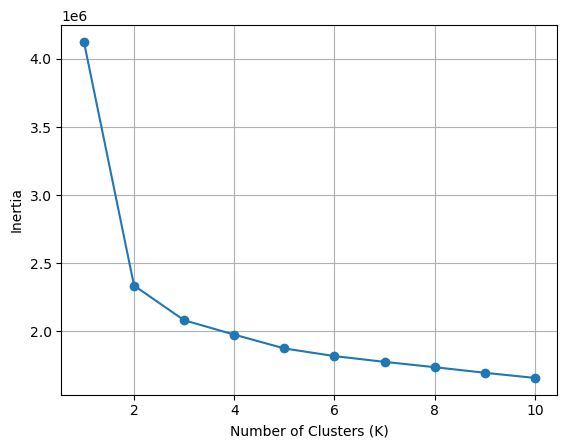

In [3]:
# Standardizing  the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train,)

# range of K
k_values = range(1, 11)

# Calculate inertia for each K
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [4]:
#Applying K-means clustering
kmeans = KMeans(n_clusters=5, n_init=10 ,random_state=42)
cluster_labels = kmeans.fit_predict(x_train_scaled)

- Initially, I have standardized the data and than used Elbow method to find the appropriate value of cluster(K). 
- From then graph it is seen we are getting lean values from K =4  and increasing value of K slowly decreases inertia. 

- So based on this I have taken K = 5. 
- Next I have used K-Means clusturing algorithm with cluster value K = 5.


### Analysis of the clustering quality 

- Using an appropriate analysis metric, the quality of the clustering is measured.

In [5]:
# Program your cluster quality metric here


from sklearn.metrics.cluster import contingency_matrix

def cluster_purity(y_train, cluster_labels):
    contingency = contingency_matrix(y_train, cluster_labels)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

purity = cluster_purity(y_train, cluster_labels)
print("Cluster Purity:", purity)


Cluster Purity: 0.43335146898803045


- I have used cluster purity metric method to measure the quality of clusturing.
- Value for which comes:(Cluster Purity: 0.43). Cluster Purity value near to  1 indiactes better quality.
    
- Although value obtained is not great but it doesn't signify not to use it, also elbow method shows that K=5 is good 
so using same.

- Visualizaton result might clearify it better if clusturing is good or not.

- The reason to choose Cluster Purity, as it is easy to interpret and it only require true labels and clustured labels 
to implement.


### Training a dimensionality reduction method 
- Reducing the number of features down to **3**. 

In [6]:
from sklearn.decomposition import PCA
# Initialize PCA with the desired number of components

pca = PCA(n_components = 3)
x_train_pca = pca.fit_transform(x_train_scaled)
#x_train_scaled.shape
x_train_pca.shape

(7352, 3)

- For dimentinality reduction I have used PCA beacause  to plot 561 features is impossible so using PCA
to reduce them to 3 features.
- PCA is computationally efficient & effective when the variability is to be retained in the reduced-dimensional representation.

### 2-D Plots after Clusturing 

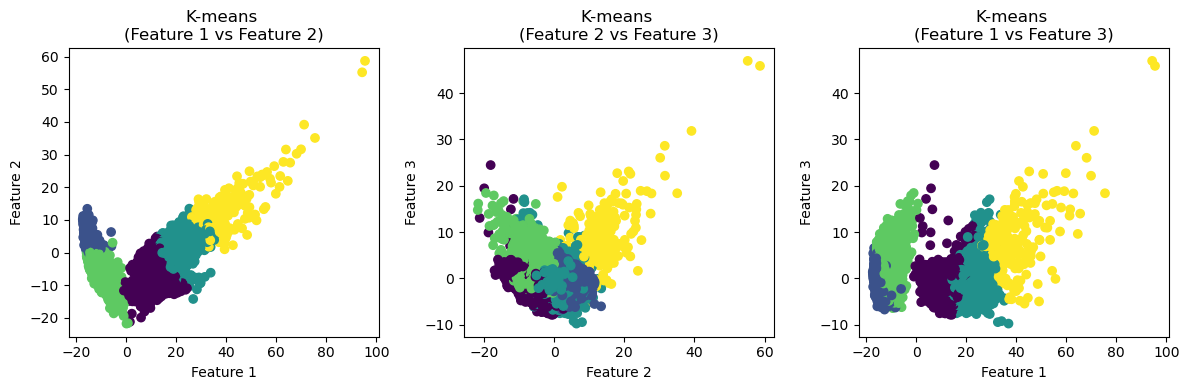

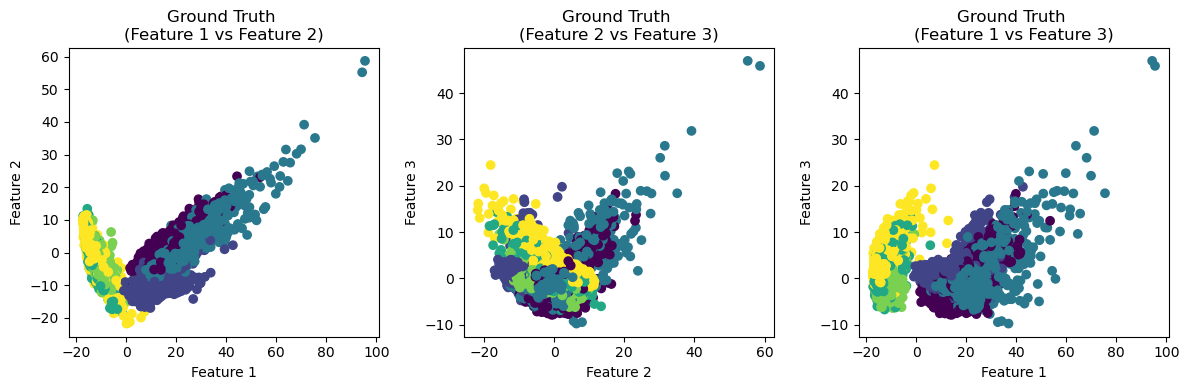

In [7]:
# Plots

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title("K-means \n(Feature 1 vs Feature 2)")
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=cluster_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plt.title("K-means \n(Feature 2 vs Feature 3)")
plt.scatter(x_train_pca[:,1], x_train_pca[:,2], c=cluster_labels)
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')

plt.subplot(133)
plt.title("K-means \n(Feature 1 vs Feature 3)")
plt.scatter(x_train_pca[:,0], x_train_pca[:,2], c=cluster_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

plt.tight_layout()
plt.show()



plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title("Ground Truth \n(Feature 1 vs Feature 2)")
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plt.title("Ground Truth \n(Feature 2 vs Feature 3)")
plt.scatter(x_train_pca[:,1], x_train_pca[:,2], c=y_train)
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')

plt.subplot(133)
plt.title("Ground Truth \n(Feature 1 vs Feature 3)")
plt.scatter(x_train_pca[:,0], x_train_pca[:,2], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

plt.tight_layout()
plt.show()

### 3-D Plots after Clusturing

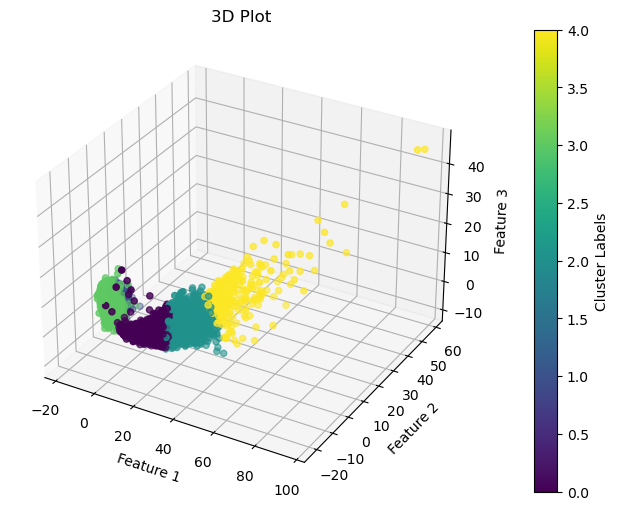

In [8]:
from matplotlib.animation import FuncAnimation

def update_rotation(num, ax, fig):
    ax.view_init(elev=num, azim=num)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], x_train_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster Labels')
ax.set_title('3D Plot')

# Animate rotation
animation = FuncAnimation(fig, update_rotation, frames=np.arange(0, 360, 2), fargs=(ax, fig), interval=50)
plt.show()

- After looking at the plots, it is seen that using 5 clusters can help in getting better results.

- Clusters formed are although near to each other but not overlapping in most of the cases and could be identified easily.
- When looked at ground labels which has 6 unique labels tends to conside a lot at times to each other.

- So even though there are 6 unique labels but using 5 clusters for the same can give better results visually. 
- Also increasing the clusters size will increase metric score, but can result in overfitting and may be harder for algorithm 
to differnetiate to which cluster assign value to.